<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/Assignment_05_Q_2Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [109]:
#load dataset
data=pd.read_csv("/content/50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [111]:
#check for missing values
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [112]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMN','Marketing Spend':'MKTS'},axis=1)
data1.head()

,RDS,ADMN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [113]:
data1[data1.duplicated()] # No duplicated data

,RDS,ADMN,MKTS,State,Profit


Correlation Analysis

In [114]:
data1.corr()

,RDS,ADMN,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMN,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Scatterplot between variables along with histograms

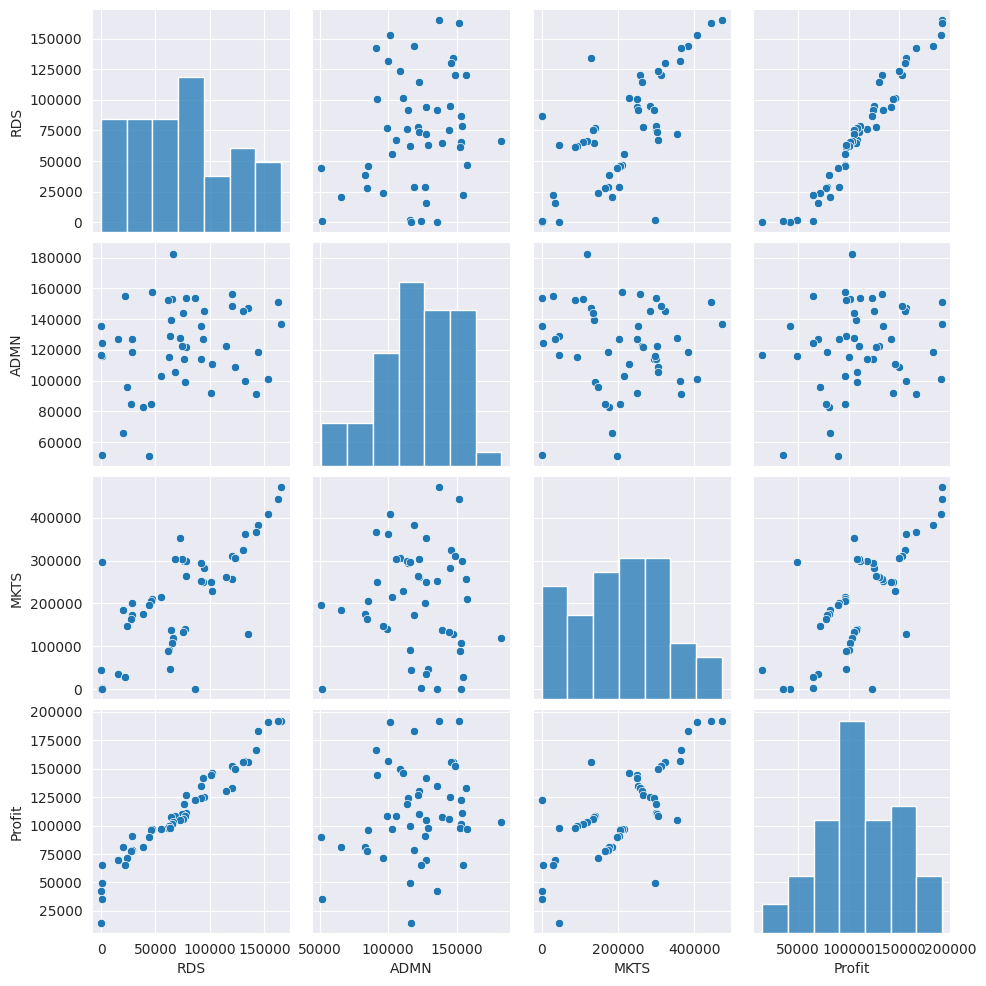

In [115]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

Preparing a model

In [116]:
#Build model
model = smf.ols('Profit~RDS+ADMN+MKTS',data=data1).fit()

In [117]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMN            -0.026816
MKTS             0.027228
dtype: float64

In [118]:
#t and p-Values
model.tvalues, model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMN         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMN         6.017551e-01
 MKTS         1.047168e-01
 dtype: float64)

In [119]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [120]:
# Build SLR and MLR models for insignificant variables 'ADMN' and 'MKTS'
# Also find their tvalues and pvalues

In [121]:
slr_a=smf.ols("Profit~ADMN",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  

(Intercept    3.040044
 ADMN         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMN         0.162217
 dtype: float64)

In [122]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [123]:
mlr_am=smf.ols("Profit~ADMN+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  

(Intercept    1.142741
 ADMN         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMN         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

MODEL VALIDATION

Two Techniques: 1. Collinearity Check & 2. Residual Analysis[link text]


In [124]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMN+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMN~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMN",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMN','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMN,1.175091
2,MKTS,2.326773


In [125]:
# Here marketing spend and R&D spending are collinear

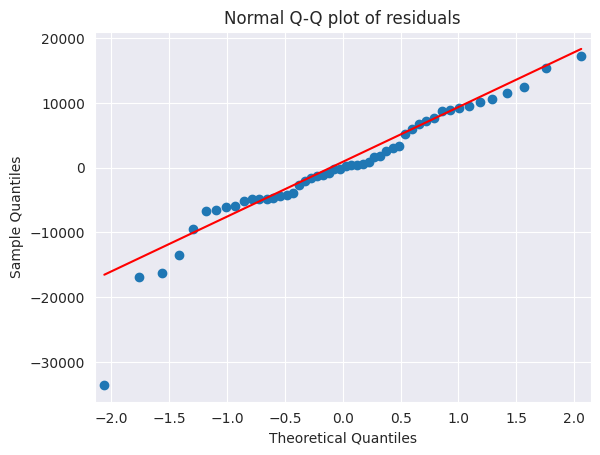

In [126]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [127]:
list(np.where(model.resid<-30000))

[array([49])]

Residual Plot for Homoscedasticity

In [128]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() # User defined z = (x - mu)/sigma

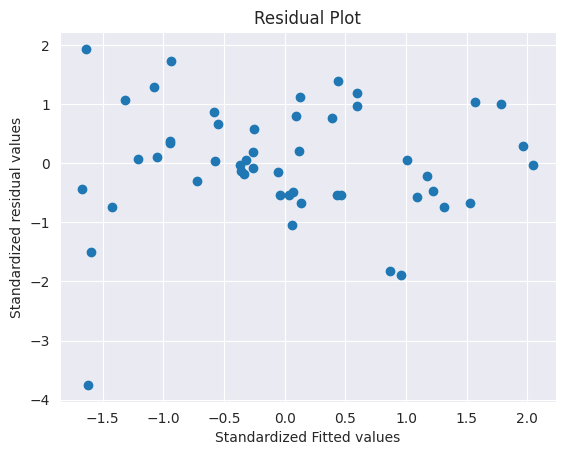

In [129]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


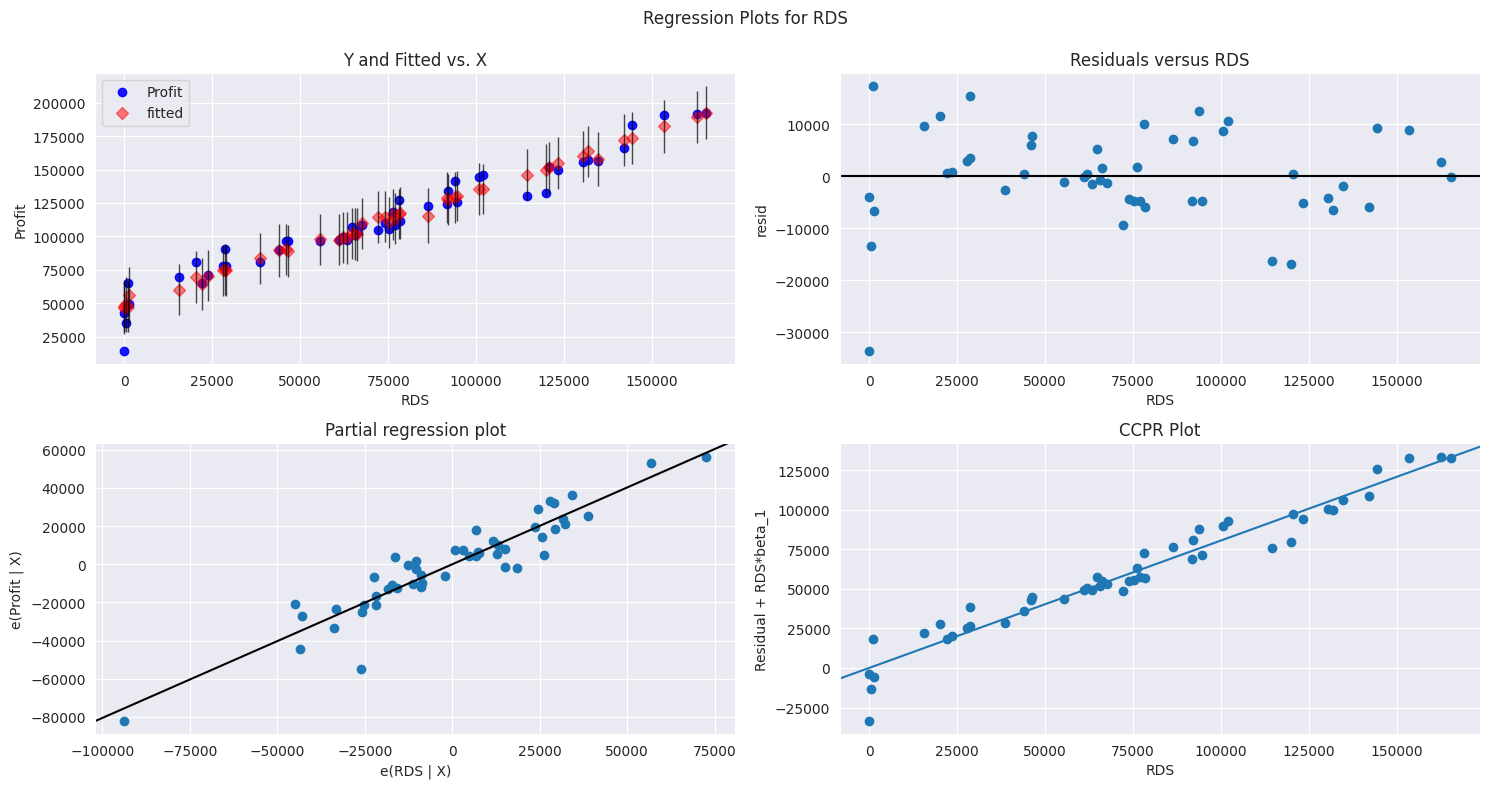

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


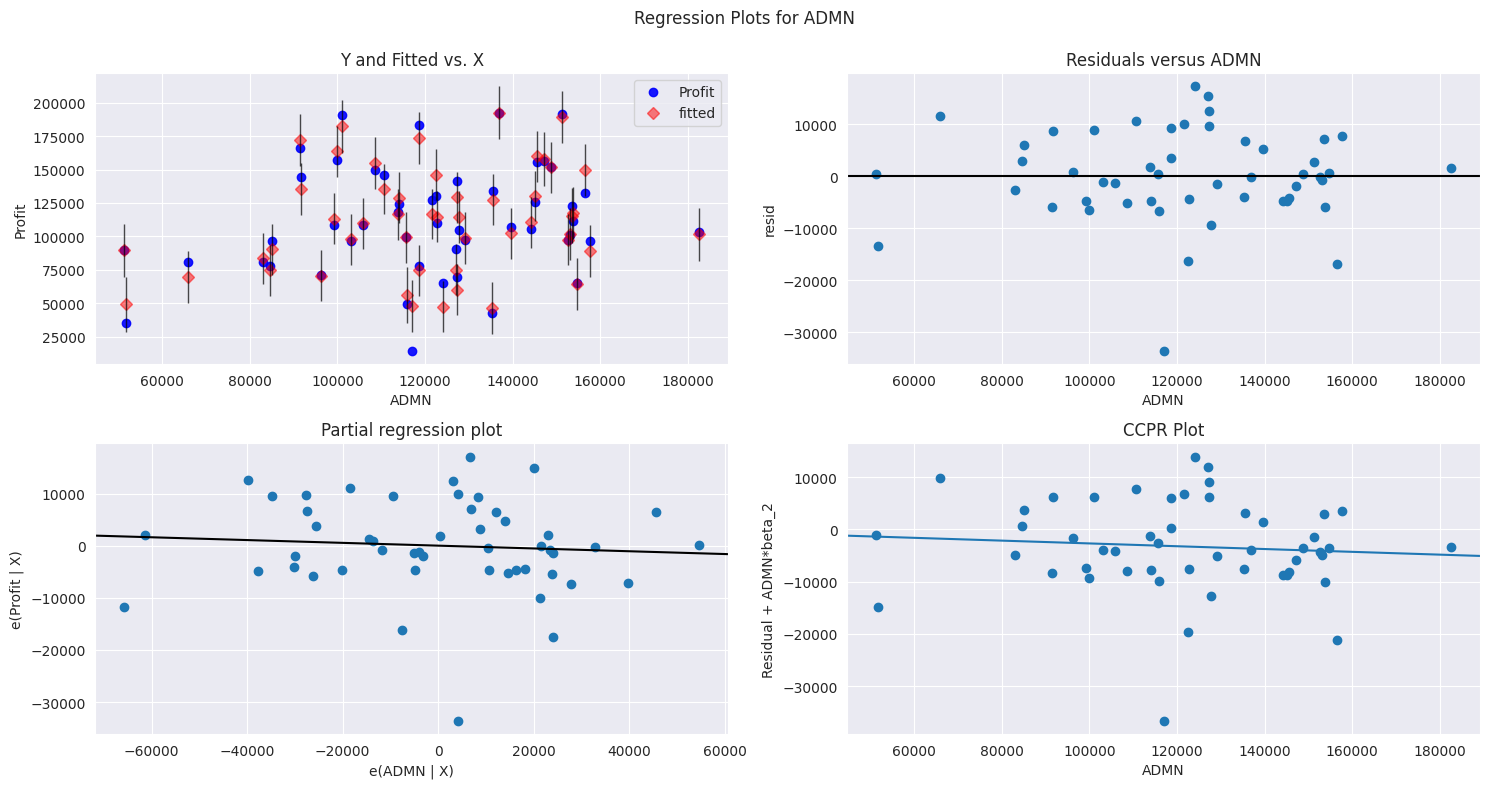

In [131]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMN',fig=fig)
plt.show()

eval_env: 1


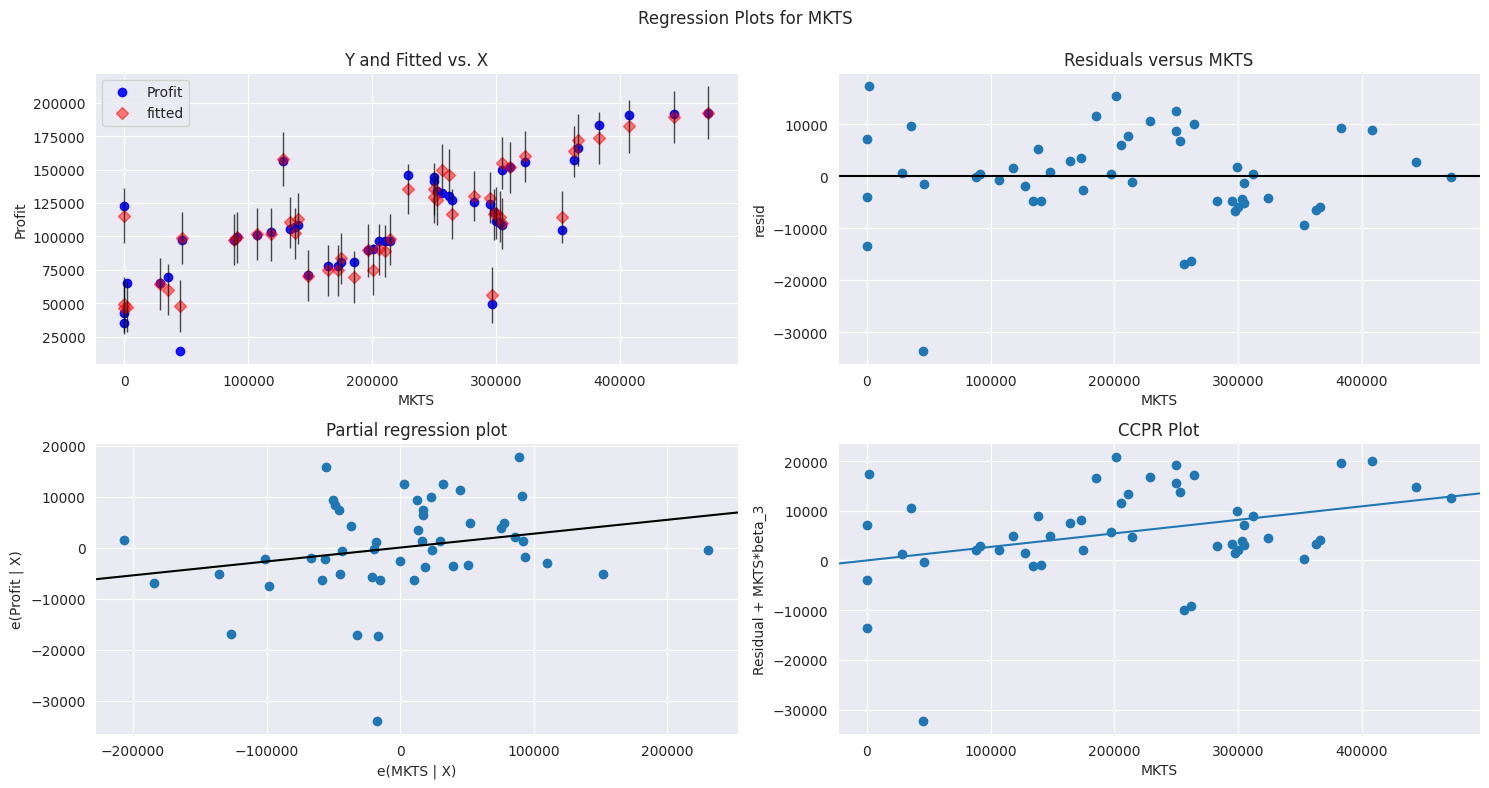

In [132]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostic
## Detecting Influencers/Outliers




Cook’s Distance

In [133]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

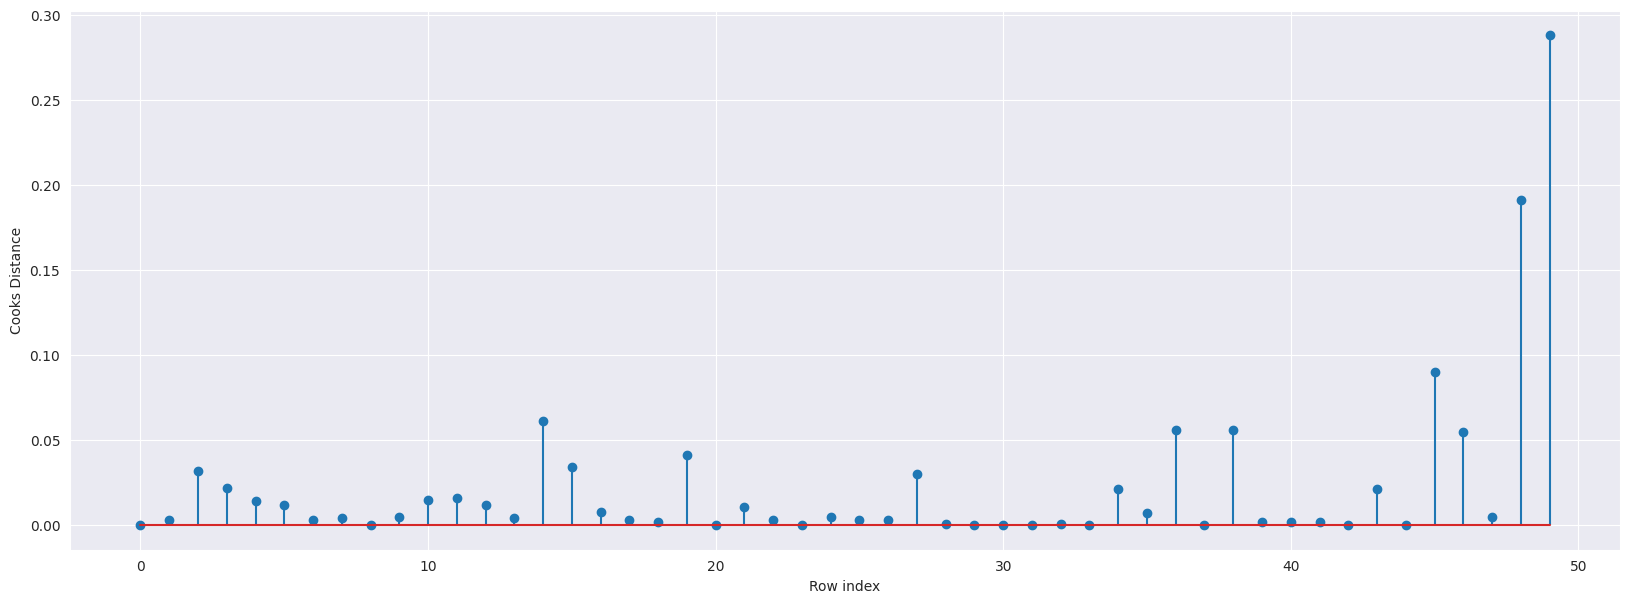

In [134]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [135]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

High Influence points

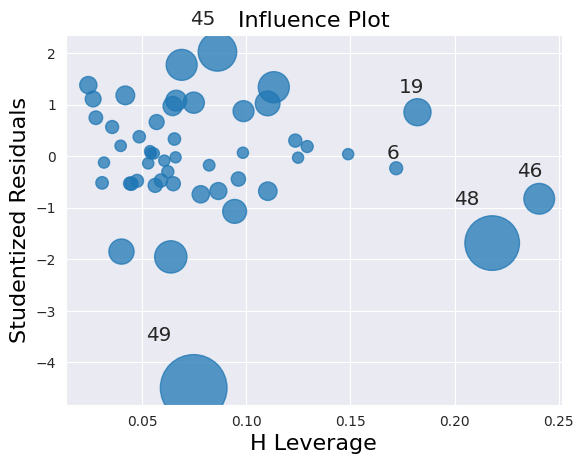

In [136]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [137]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff      

0.36

In [138]:
data1[data1.index.isin([49])] 

,RDS,ADMN,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


From the above plot, it is evident that data point 49 are the influencers

In [139]:
#See the differences in R&D spending (RDS) and other variable values
data1.head()

,RDS,ADMN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Improving the model

In [140]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data2=data1.drop(data1.index[[49]],axis=0).reset_index (drop=True)
data2

,RDS,ADMN,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Build Model

In [141]:
#Exclude variable "RDS" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~ADMN+MKTS',data = data2).fit()
(final_ml_V.rsquared,final_ml_V.aic)

(0.6011271008483876, 1132.8932261550513)

In [142]:
#Exclude variable "mkts" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~ADMN+RDS',data = data2).fit()
(final_ml_V.rsquared,final_ml_V.aic)

(0.9584519070123048, 1022.0654576388338)

Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'MKTS' so that multi collinearity problem would be resolved.

Cook’s Distance

In [143]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

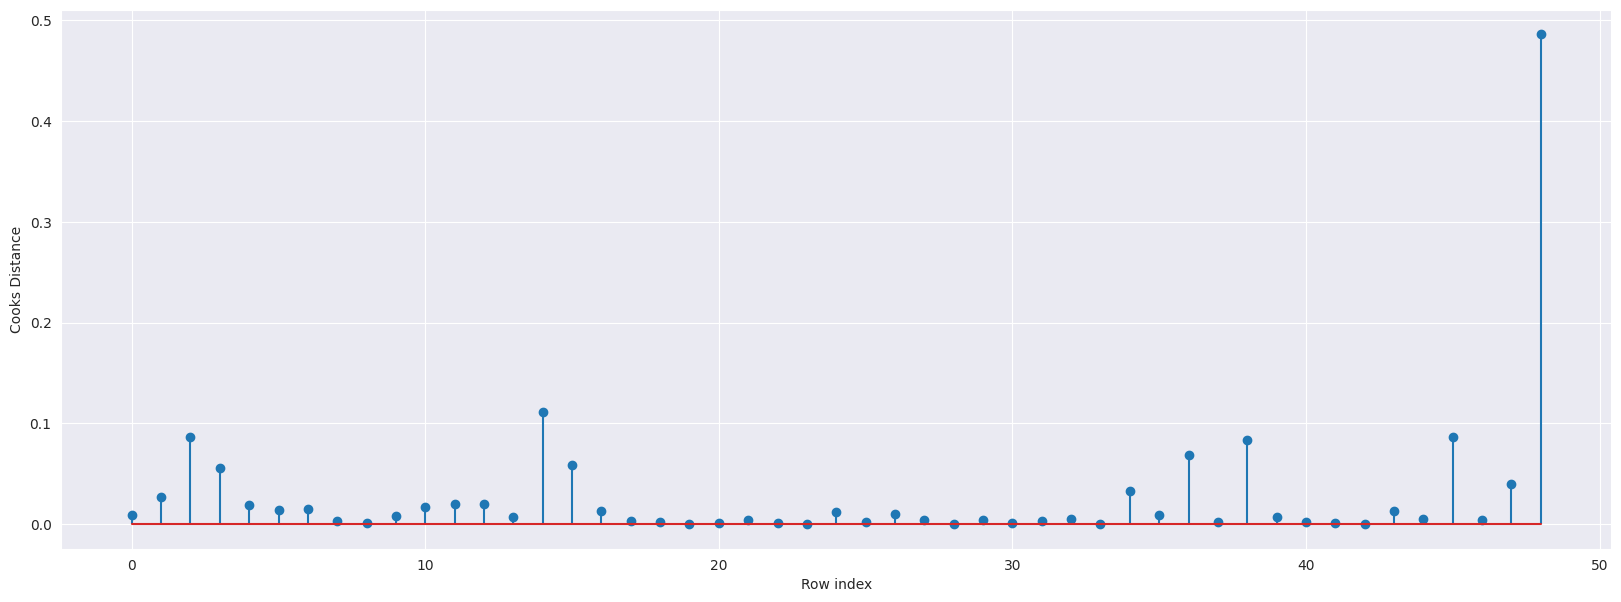

In [144]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [145]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(48, 0.485849275082168)

In [146]:
while np.max(c_V)>0.5 :
    model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
    (c_v,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c_v)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+ADMN+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [147]:
final_model.rsquared

0.9613162435129847

Predicting for new data

In [148]:

new_data=pd.DataFrame({'RDS':70000,"ADMN":90000,"MKTS":140000},index=[1])

In [149]:
new_data

,RDS,ADMN,MKTS
1,70000,90000,140000


In [150]:
final_ml_V.predict(new_data)

1    111093.397094
dtype: float64

In [151]:
final_ml_V.predict(data2.iloc[0:5,])

0    188527.663118
1    185558.825707
2    180243.773176
3    171858.931118
4    171232.968990
dtype: float64

In [152]:
pred_y = final_ml_V.predict(data2)

In [154]:
pred_y

0     188527.663118
1     185558.825707
2     180243.773176
3     171858.931118
4     171232.968990
5     162300.693298
6     162389.594380
7     158862.349931
8     150569.266301
9     154757.642444
10    136783.264898
11    136619.095117
12    129286.956745
13    127345.387542
14    149705.843729
15    146754.502575
16    116318.297391
17    129125.848290
18    128131.056761
19    121856.928346
20    115207.972358
21    115140.273076
22    112908.147854
23    108302.745337
24    116544.156339
25    104340.656210
26    113031.872535
27    111096.996202
28    103499.992994
29    104501.001518
30    103220.205725
31    100784.955745
32    103771.367822
33     98376.372110
34     88271.451363
35     91296.626761
36     74862.198399
37     91239.400907
38     70654.396741
39     85167.632556
40     75332.502475
41     76182.506917
42     72100.052431
43     63861.125253
44     68159.878253
45     51899.907986
46     52549.747281
47     50541.931232
48     54875.595764
dtype: float64

table containing R^2 value for each prepared model

In [155]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
